Assumptions:

Data was entered accurately

    I cant check and change every cell on a large data set, so I won't do that here for the genres category
    
    However I will browse through the aritsts to see if I like how they have been entered
   
       IF an artist is not how I would like it to be, I will change it
       
       ELSE the artist name will not change


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
%matplotlib inline

def t_sec(x):
    x=str(x)
    m=x[0]
    s=x[1:3]
    m=int(m)
    s=int(s)
    t=m*60+s
    return t

df=pd.read_csv("/Users/thomas/GA-DSI/projects/projects-weekly/project-02/assets/billboard.csv")
name=range(1,77)
names=["week_"+str(x) for x in name]

#Renaming columns; made easier by using range function and concatenation
df.columns=['year','artist','track_name','track_time','genre','date_entered','date_peaked','week_1', 'week_2', \
            'week_3', 'week_4', 'week_5', 'week_6', 'week_7', 'week_8', 'week_9', 'week_10', 'week_11', 'week_12',\
            'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_18', 'week_19', 'week_20', 'week_21', \
            'week_22', 'week_23', 'week_24', 'week_25', 'week_26', 'week_27', 'week_28', 'week_29', 'week_30', \
            'week_31', 'week_32', 'week_33', 'week_34', 'week_35', 'week_36', 'week_37', 'week_38', 'week_39', \
            'week_40', 'week_41', 'week_42', 'week_43', 'week_44', 'week_45', 'week_46', 'week_47', 'week_48', \
            'week_49', 'week_50', 'week_51', 'week_52', 'week_53', 'week_54', 'week_55', 'week_56', 'week_57', \
            'week_58', 'week_59', 'week_60', 'week_61', 'week_62', 'week_63', 'week_64', 'week_65', 'week_66', \
            'week_67', 'week_68', 'week_69', 'week_70', 'week_71', 'week_72', 'week_73', 'week_74', 'week_75', \
            'week_76']

#Change time to seconds
df["track_time"]=df["track_time"].apply(lambda x: t_sec(int(x[0:7].replace(',',''))))

#Change Genre Names
df['genre'].replace('R & B','R&B', inplace=True)
df['genre'].replace("Rock'n'roll","Rock",inplace=True)

#Datetime
df['date_entered']=pd.to_datetime(df['date_entered'])
df['date_peaked']=pd.to_datetime(df['date_peaked'])

#Artist Names
df["artist"].replace("Janet","Janet Jackson",inplace=True)
df["artist"].replace("2Ge+her","2Gether",inplace=True)
df["artist"].replace("matchbox twenty","Matchbox Twenty",inplace=True)

#Take * and replace with NaN
df.replace('*',101,inplace=True)
#New column for days between date_entered and date_peaked
df["days_between"]= [int(datetime.strftime(x,"%j"))-int(datetime.strftime(y,"%j")) if  \
       int(datetime.strftime(x,"%j"))-int(datetime.strftime(y,"%j"))>=0 else \
       int(datetime.strftime(x,"%j"))-int(datetime.strftime(y,"%j"))+365 \
                    for x,y in zip([x for x in df['date_peaked'] if int(str(pd.to_datetime(x,'%Y'))[0:4]) == 2000]\
                                   , df['date_entered'])]
#look up how to convert date to how many days have past in year
#might have to set date to %m-%d and create dictionary with month values and compute manually from there


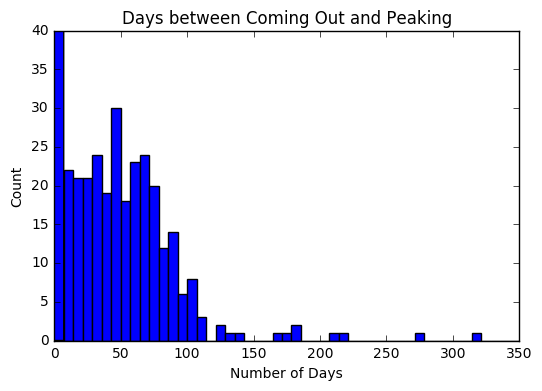

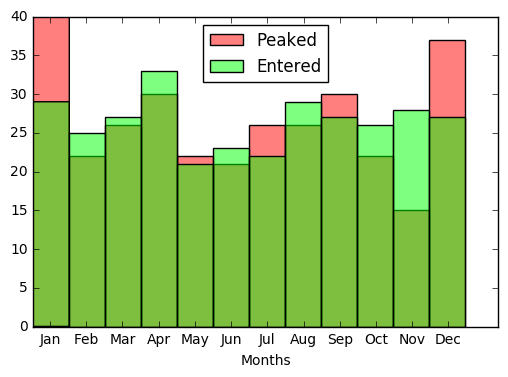

In [57]:
#plt.bar(df['date_peaked'].unique(),df['date_peaked'].value_counts())
#plt.show()
plt.hist(df['days_between'],np.linspace(0,350,50))
plt.title("Days between Coming Out and Peaking")
plt.xlabel("Number of Days")
plt.ylabel("Count")
plt.show()

month_peak=np.array([datetime.strftime(x,"%-m") for x in df['date_peaked']]).astype(int)
start=np.array([datetime.strftime(x,'%-m') for x in df["date_entered"]]).astype(int)

plt.hist(month_peak,np.linspace(0,13,13),color=(1,0,0,.5),label="Peaked")
plt.hist(start,np.linspace(0,13,13),color=(0,1,0,.5),label="Entered")
plt.xticks(np.linspace(.5,12.5,12),["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.xlabel("Months")
plt.legend(loc=9)

plt.show()

In [29]:
pd.to_datetime(df["date_peaked"])

0     2000-11-18
1     2000-04-08
2     2000-01-29
3     2000-09-16
4     2000-10-14
5     2000-08-26
6     2000-03-18
7     2000-06-24
8     2000-08-12
9     2000-03-04
10    2000-07-29
11    2000-01-15
12    2000-07-15
13    2000-11-11
14    2000-06-17
15    2000-07-22
16    2000-02-19
17    2000-04-22
18    2000-12-02
19    2000-12-30
20    2000-05-06
21    2000-06-03
22    2000-09-30
23    2000-08-19
24    2000-11-11
25    2000-05-20
26    2000-07-01
27    2000-01-08
28    2000-07-01
29    2000-02-12
         ...    
287   2000-09-09
288   2000-09-16
289   2000-07-22
290   2000-02-05
291   2000-03-11
292   2000-06-17
293   2000-04-15
294   2000-08-26
295   2000-01-15
296   2000-01-22
297   2000-12-02
298   2000-05-20
299   2000-06-17
300   2000-05-06
301   2000-04-01
302   2000-09-16
303   2000-09-16
304   2000-07-29
305   2000-11-18
306   2000-12-23
307   2000-03-11
308   2000-12-02
309   2000-12-30
310   2000-08-19
311   2000-11-18
312   2000-08-05
313   2000-02-12
314   2000-09-

In [58]:
df.head()

,year,artist,track_name,track_time,genre,date_entered,date_peaked,week_1,week_2,week_3,...,week_68,week_69,week_70,week_71,week_72,week_73,week_74,week_75,week_76,days_between
0,2000,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,78,63,49,...,101,101,101,101,101,101,101,101,101,56
1,2000,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,15,8,6,...,101,101,101,101,101,101,101,101,101,56
2,2000,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,71,48,43,...,101,101,101,101,101,101,101,101,101,98
3,2000,Madonna,Music,225,Rock,2000-08-12,2000-09-16,41,23,18,...,101,101,101,101,101,101,101,101,101,35
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,2000-08-05,2000-10-14,57,47,45,...,101,101,101,101,101,101,101,101,101,70


In [ ]:
date_peaked=np.array([[x,temp["M"].value_counts()[x]] for x in temp["M"].unique()])
dat_p=date_peaked.T[0]
day_p=(date_peaked.T[1]).astype(int)
peaked=date_peaked.T

In [54]:
r=[x for x in df['date_peaked'] if int(str(pd.to_datetime(x,'%Y'))[0:4]) == 2000]
r

[Timestamp('2000-11-18 00:00:00'),
 Timestamp('2000-04-08 00:00:00'),
 Timestamp('2000-01-29 00:00:00'),
 Timestamp('2000-09-16 00:00:00'),
 Timestamp('2000-10-14 00:00:00'),
 Timestamp('2000-08-26 00:00:00'),
 Timestamp('2000-03-18 00:00:00'),
 Timestamp('2000-06-24 00:00:00'),
 Timestamp('2000-08-12 00:00:00'),
 Timestamp('2000-03-04 00:00:00'),
 Timestamp('2000-07-29 00:00:00'),
 Timestamp('2000-01-15 00:00:00'),
 Timestamp('2000-07-15 00:00:00'),
 Timestamp('2000-11-11 00:00:00'),
 Timestamp('2000-06-17 00:00:00'),
 Timestamp('2000-07-22 00:00:00'),
 Timestamp('2000-02-19 00:00:00'),
 Timestamp('2000-04-22 00:00:00'),
 Timestamp('2000-12-02 00:00:00'),
 Timestamp('2000-12-30 00:00:00'),
 Timestamp('2000-05-06 00:00:00'),
 Timestamp('2000-06-03 00:00:00'),
 Timestamp('2000-09-30 00:00:00'),
 Timestamp('2000-08-19 00:00:00'),
 Timestamp('2000-11-11 00:00:00'),
 Timestamp('2000-05-20 00:00:00'),
 Timestamp('2000-07-01 00:00:00'),
 Timestamp('2000-01-08 00:00:00'),
 Timestamp('2000-07-

In [36]:
pd.set_option('display.max_rows', 80)